# Package Installation and import
Here, we will install and import necessary packages for our code. 
These contain extra functions that we will need to make our program work

In [1]:
%pip install -r requirements_yolo.txt
import os
HOME = os.getcwd() # Get the current working directory
import ultralytics
from ultralytics import YOLO # Import YOLO class. This class is used to create a YOLOv8 model
from IPython.display import display, Image
from roboflow import Roboflow
import torch
from tqdm import tqdm



Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 2.2 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 61.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.2/721.2 kB 86.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 93.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 64.5 MB/s eta 0:00:00
   ━━━

/home/rosworkshop/miniconda3/envs/cvworkshop/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


_______________________________________________________________________________________________

# Loading the dataset
We will first create the place where we will store the dataset.
Then, we will import a pre-existing dataset from the web using *Roboflow*. You can later try to use a different dataset by going onto https://universe.roboflow.com/ and finding another dataset. Then, change the **datasetname** variable


In [2]:
#create the directory for the datasets:
datasets_dir = os.path.join(HOME, "datasets")
os.makedirs(datasets_dir, exist_ok=True)
os.chdir(datasets_dir)

# Download the dataset from Roboflow
datasetname = "dog_cat-test"
rf = Roboflow(api_key="f5pOg5frjQ3XAImBbLxX")
project = rf.workspace("ravensburgweingarten").project(datasetname)
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.27, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Dog_Cat-Test-1 in yolov8:: 100%|██████████| 776/776 [00:00<00:00, 25039.27it/s]


# The Dataset
Get acquainted with your dataset. Let us try looking at one element from it:

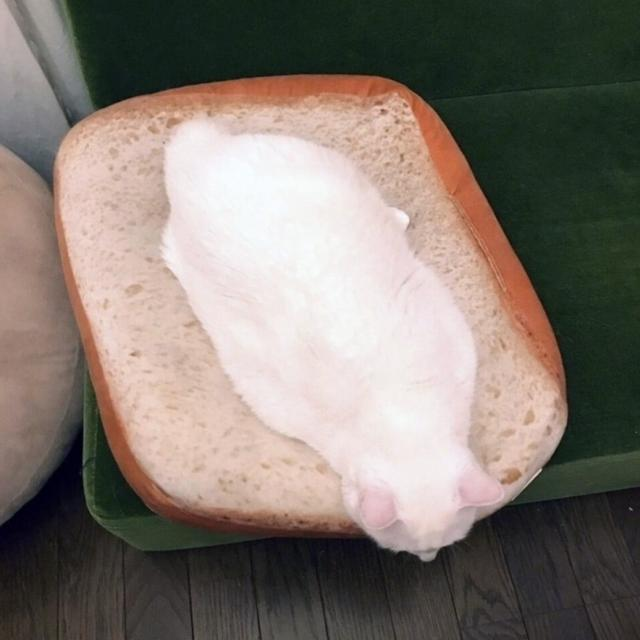

/home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/test/labels/Ic64CrKUNJY_jpg.rf.5df8f03d1a1e3eb766205e519427cef8.txt


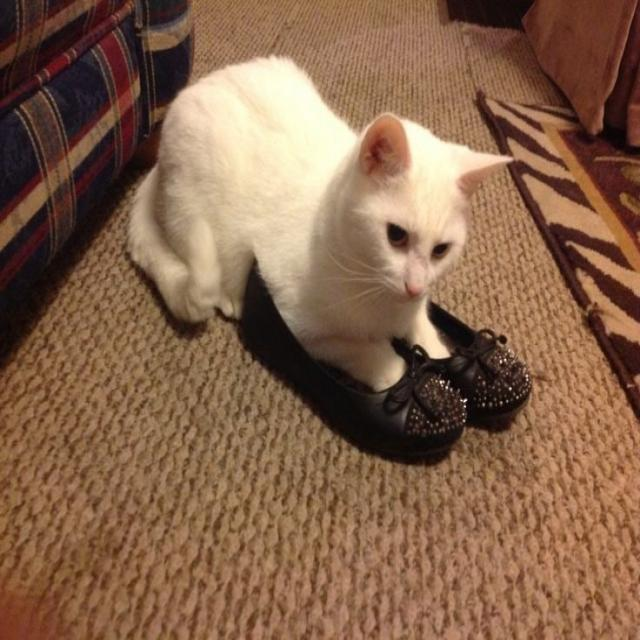

/home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/test/labels/1101-WMH1xzEznuY_jpg.rf.676977a5b57a822403c8972b53c18a78.txt


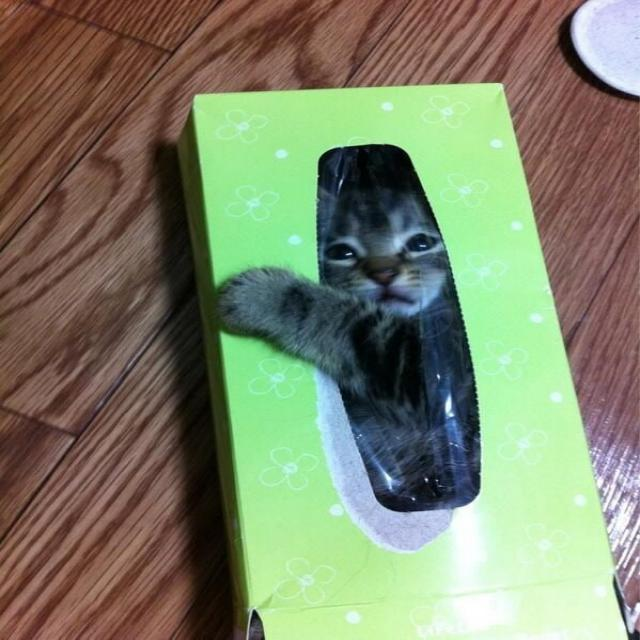

/home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/test/labels/0066-J3l4Zf33nfc_jpg.rf.383d5bcd3ef60f04ec23c8ffd36d69de.txt


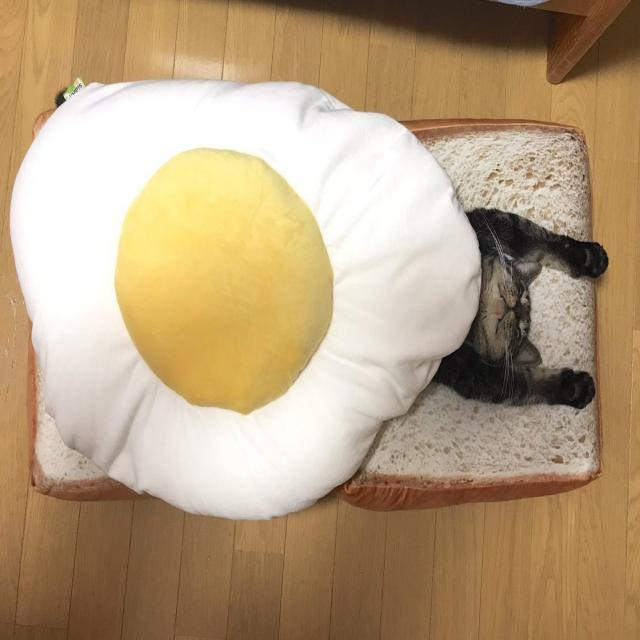

/home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/test/labels/S2IGnPjVCJs_jpg.rf.5b5c93288819429fe061491c755270ea.txt


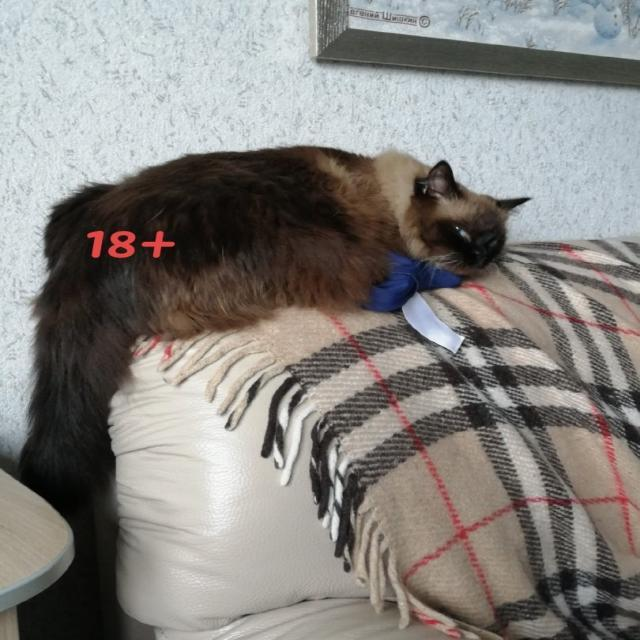

/home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/test/labels/0502-xxdTZFljIfw_jpg.rf.093904c6fedff15104711843f5832aa5.txt


In [3]:
#get the first element from the dataset (code on computer)
sample = f"{HOME}/datasets/{datasetname}/test/images/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg"
#get the full address of elements in the dataset
datasetname = "Dog_Cat-Test-1"
images = [os.path.join(datasets_dir, datasetname, "test", "images", image) for image in os.listdir(os.path.join(datasets_dir, datasetname, "test", "images"))]
labels = [os.path.join(datasets_dir, datasetname, "test", "labels", label) for label in os.listdir(os.path.join(datasets_dir, datasetname, "test", "labels"))]
#display five random pictures alongside their labels
for i in range(5):
    display(Image(filename=images[i]))
    print(labels[i])


## Fix data.yaml
We need to manually fix this file because the dataset is intended to be used in a different environment.

1. in datasets/Dog_Cat-Test-1 <br>
2. go to data.yaml <br>
3. change 2 parameter as follow: <br>
     train: train/images <br>
     val: valid/images <br>

_______________________________________________________________________________________________

# Training the model
We will now simply feed the dataset to YOLO so that it learns how to recognise elements from it. 

In [5]:
%cd {HOME}
data_path= f"{dataset.location}/data.yaml"
data_path

/home/rosworkshop/CV_WorkShop


'/home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/data.yaml'

In [6]:
%cd {HOME}

model = YOLO("yolov8n.yaml")
results = model.train(data= os.path.join(dataset.location, 'data.yaml'), epochs=50, imgsz=640, plots=True)

/home/rosworkshop/CV_WorkShop
New https://pypi.org/project/ultralytics/8.1.34 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.27 🚀 Python-3.12.2 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag

100%|██████████| 755k/755k [00:00<00:00, 3.47MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 225 layers, 3011043 parameters, 3011027 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 13.3MB/s]


AMP: checks passed ✅


train: Scanning /home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/train/labels... 321 images, 0 backgrounds, 0 corrupt: 100%|██████████| 321/321 [00:00<00:00, 1754.07it/s]

train: New cache created: /home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/train/labels.cache



val: Scanning /home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/valid/labels... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 920.08it/s]

val: New cache created: /home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.15G       3.13      3.539       4.18          2        640: 100%|██████████| 21/21 [00:02<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.05it/s]

                   all         43         50    0.00349        0.9     0.0136    0.00468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.24G      3.117      3.446      4.073          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.49it/s]

                   all         43         50    0.00349        0.9     0.0187    0.00536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.25G      3.049      3.445      3.896          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.57it/s]

                   all         43         50    0.00318       0.82     0.0622     0.0153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.26G       2.93      3.376      3.689          5        640: 100%|██████████| 21/21 [00:01<00:00, 17.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.07it/s]

                   all         43         50     0.0213       0.72      0.123     0.0275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.24G      2.932       3.33      3.534          2        640: 100%|██████████| 21/21 [00:01<00:00, 18.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.93it/s]


                   all         43         50     0.0109       0.66     0.0284    0.00761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.25G      2.789       3.21      3.389          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.60it/s]

                   all         43         50     0.0231       0.64     0.0679     0.0165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.25G      2.682      3.231      3.346          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]

                   all         43         50        0.1        0.2     0.0501     0.0131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.25G      2.637      3.152      3.187          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]

                   all         43         50     0.0157       0.78     0.0287    0.00888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.24G      2.573      3.166      3.166          1        640: 100%|██████████| 21/21 [00:01<00:00, 18.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.81it/s]

                   all         43         50     0.0813       0.36      0.107     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.25G      2.539      3.161      3.118          4        640: 100%|██████████| 21/21 [00:01<00:00, 18.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.19it/s]

                   all         43         50    0.00357       0.92     0.0892     0.0197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G      2.507      3.087      3.037          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all         43         50      0.019       0.74     0.0896     0.0289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.25G      2.467      3.045      2.993          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.63it/s]

                   all         43         50     0.0319        0.5     0.0256    0.00761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.24G      2.472      3.033      2.993          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.37it/s]

                   all         43         50      0.058       0.14      0.044     0.0105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.25G      2.318      2.879      2.878          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.89it/s]

                   all         43         50     0.0982       0.28     0.0906     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.25G        2.3       2.97      2.838          4        640: 100%|██████████| 21/21 [00:01<00:00, 17.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.15it/s]

                   all         43         50     0.0649       0.14     0.0461      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.26G        2.3      2.839      2.755          5        640: 100%|██████████| 21/21 [00:01<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.30it/s]

                   all         43         50      0.265       0.18      0.134     0.0395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.24G      2.267      2.809      2.767          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.22it/s]

                   all         43         50     0.0626        0.5      0.107     0.0365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.25G      2.173      2.814      2.728          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.96it/s]

                   all         43         50      0.154       0.28      0.137     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.25G      2.217      2.711      2.709          3        640: 100%|██████████| 21/21 [00:01<00:00, 17.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.94it/s]


                   all         43         50       0.12       0.44      0.107     0.0306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.25G      2.221      2.698       2.75          2        640: 100%|██████████| 21/21 [00:01<00:00, 16.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.64it/s]

                   all         43         50        0.2       0.26      0.194     0.0587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.24G      2.174      2.676      2.664          4        640: 100%|██████████| 21/21 [00:01<00:00, 17.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.64it/s]

                   all         43         50      0.171       0.32      0.173     0.0604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.25G      2.136      2.647      2.616          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.22it/s]

                   all         43         50     0.0874       0.62     0.0787     0.0206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.25G      2.106      2.585      2.604          3        640: 100%|██████████| 21/21 [00:01<00:00, 17.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.44it/s]

                   all         43         50      0.128        0.5      0.144     0.0447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.25G      2.106      2.561      2.612          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.21it/s]

                   all         43         50      0.189       0.32      0.138     0.0351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.24G      2.086      2.511      2.566          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.99it/s]

                   all         43         50       0.11        0.5      0.103     0.0307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.25G      2.098      2.566      2.604          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.72it/s]

                   all         43         50      0.202       0.46      0.174     0.0505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.25G      2.046      2.534      2.558          4        640: 100%|██████████| 21/21 [00:01<00:00, 17.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]

                   all         43         50      0.254        0.4      0.197     0.0636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.25G      2.039      2.488      2.552          2        640: 100%|██████████| 21/21 [00:01<00:00, 16.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.56it/s]

                   all         43         50       0.22       0.48      0.187     0.0586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.24G      2.036      2.402      2.522          3        640: 100%|██████████| 21/21 [00:01<00:00, 17.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.01it/s]


                   all         43         50      0.223       0.58       0.22     0.0665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.25G      1.988       2.39      2.507          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.08it/s]

                   all         43         50      0.331       0.48      0.281     0.0901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.25G      2.029      2.442      2.529          1        640: 100%|██████████| 21/21 [00:01<00:00, 16.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]

                   all         43         50      0.335       0.48      0.331      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.25G      1.947      2.317      2.458          4        640: 100%|██████████| 21/21 [00:01<00:00, 17.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.89it/s]

                   all         43         50      0.401       0.42      0.361      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.24G      1.927      2.386      2.434          6        640: 100%|██████████| 21/21 [00:01<00:00, 17.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.71it/s]

                   all         43         50      0.435        0.4       0.33      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.25G      1.924      2.325      2.445          5        640: 100%|██████████| 21/21 [00:01<00:00, 16.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.10it/s]

                   all         43         50      0.494       0.36      0.355      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.25G      1.949      2.254      2.428          3        640: 100%|██████████| 21/21 [00:01<00:00, 17.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.29it/s]

                   all         43         50      0.442       0.38      0.392      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.25G      1.965      2.279      2.455          3        640: 100%|██████████| 21/21 [00:01<00:00, 17.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.72it/s]

                   all         43         50      0.486        0.5       0.42      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.24G      1.933      2.314      2.421          2        640: 100%|██████████| 21/21 [00:01<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.50it/s]

                   all         43         50      0.434      0.475      0.423       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.25G      1.902      2.283      2.411          4        640: 100%|██████████| 21/21 [00:01<00:00, 16.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all         43         50      0.491       0.52      0.437       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.25G      1.903      2.257      2.433          4        640: 100%|██████████| 21/21 [00:01<00:00, 17.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.02it/s]

                   all         43         50      0.456        0.5       0.49      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.25G      1.831      2.221      2.398          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.68it/s]

                   all         43         50      0.407       0.54      0.443      0.154


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.24G      1.856      2.471      2.584          1        640: 100%|██████████| 21/21 [00:01<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.38it/s]

                   all         43         50      0.442        0.6      0.444      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.25G      1.839      2.334      2.594          1        640: 100%|██████████| 21/21 [00:01<00:00, 18.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.43it/s]

                   all         43         50      0.537       0.42      0.438      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.25G      1.773       2.12      2.475          1        640: 100%|██████████| 21/21 [00:01<00:00, 18.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.80it/s]


                   all         43         50      0.619        0.5      0.502      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.25G      1.804      2.149      2.508          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.85it/s]

                   all         43         50      0.511       0.54      0.498       0.19



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.24G      1.801      2.062      2.459          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.40it/s]

                   all         43         50      0.513       0.54      0.443      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.25G      1.742      2.027      2.462          1        640: 100%|██████████| 21/21 [00:01<00:00, 18.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.66it/s]

                   all         43         50      0.634       0.56      0.556      0.209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.25G      1.757      2.015      2.473          1        640: 100%|██████████| 21/21 [00:01<00:00, 18.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.66it/s]


                   all         43         50      0.564      0.517      0.474      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.25G      1.746      1.958      2.453          1        640: 100%|██████████| 21/21 [00:01<00:00, 17.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.40it/s]


                   all         43         50      0.601       0.58      0.539      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.24G       1.76      1.956      2.464          1        640: 100%|██████████| 21/21 [00:01<00:00, 16.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.42it/s]

                   all         43         50      0.531       0.54      0.482      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.25G      1.758      1.935      2.462          1        640: 100%|██████████| 21/21 [00:01<00:00, 18.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.49it/s]

                   all         43         50      0.503       0.52      0.529      0.215



50 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.27 🚀 Python-3.12.2 torch-2.2.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]


                   all         43         50      0.502       0.52       0.53      0.218
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


_______________________________________________________________________________________________

# Model Evaluation
When we are analysing how well YOLO is at predicting the contents of an image, there are several metrics we can use.
The most important ones are the **training loss** and the **validation loss**. The lower these values are, the better your algorithm is at predicting data. 

/home/rosworkshop/CV_WorkShop


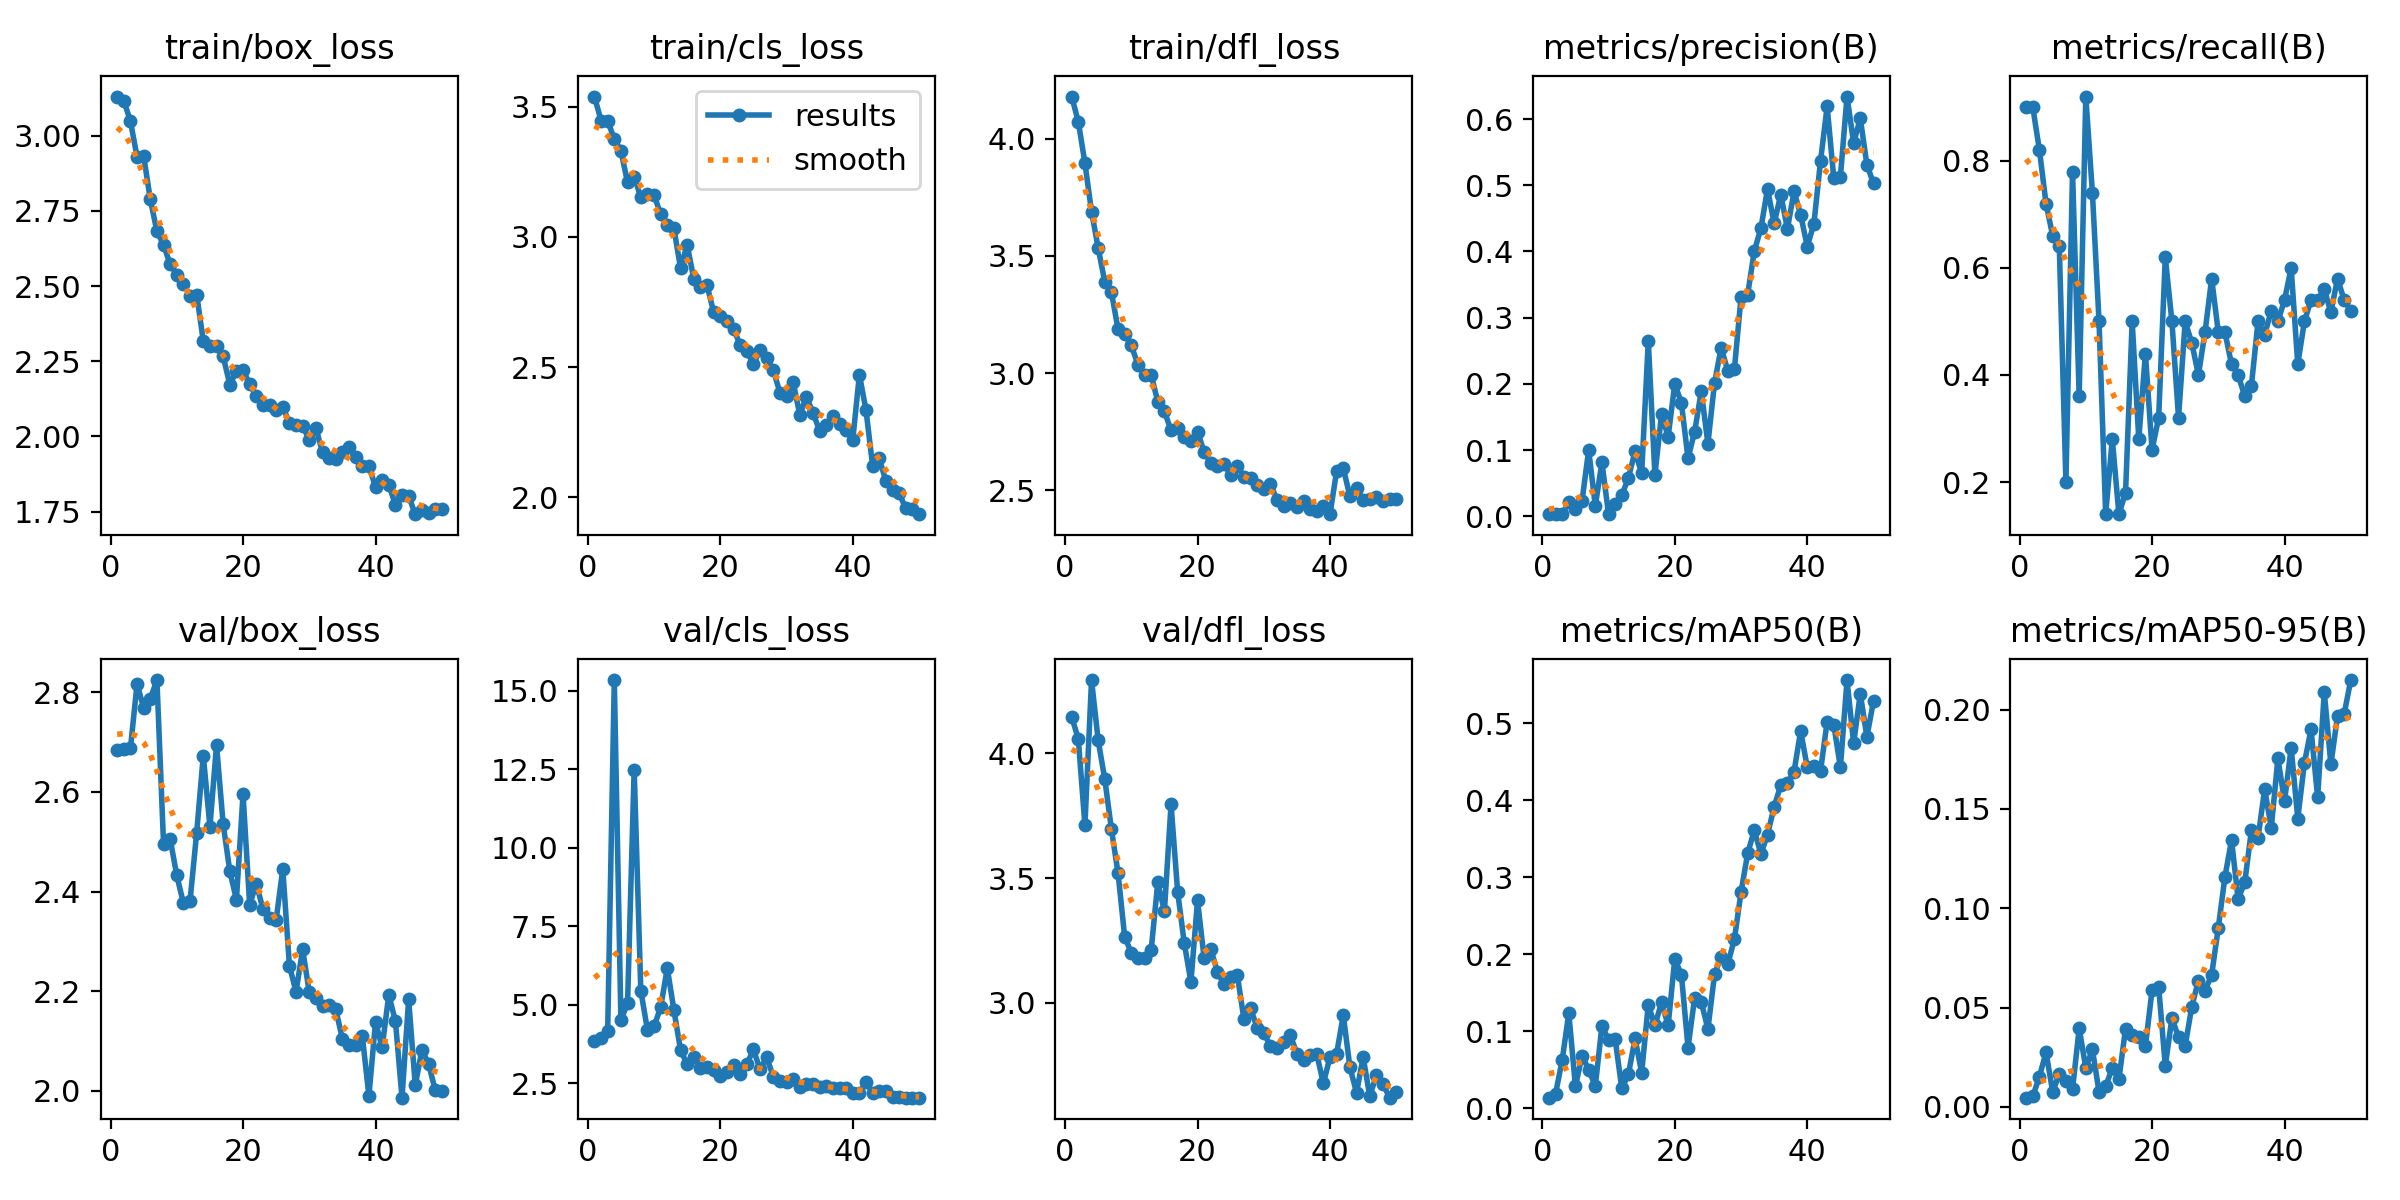

In [7]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

# Furthermore, here is the F-1 Curve
The F-1 curve tells us the overall performance of our model. It is particularly insightful because it **accounts for underrepresented classes**.
Imagine you have a thousand pictures of dogs and five of cats. You might have high accuracy if you always output dogs, but your F1 score will reflect this issue. 

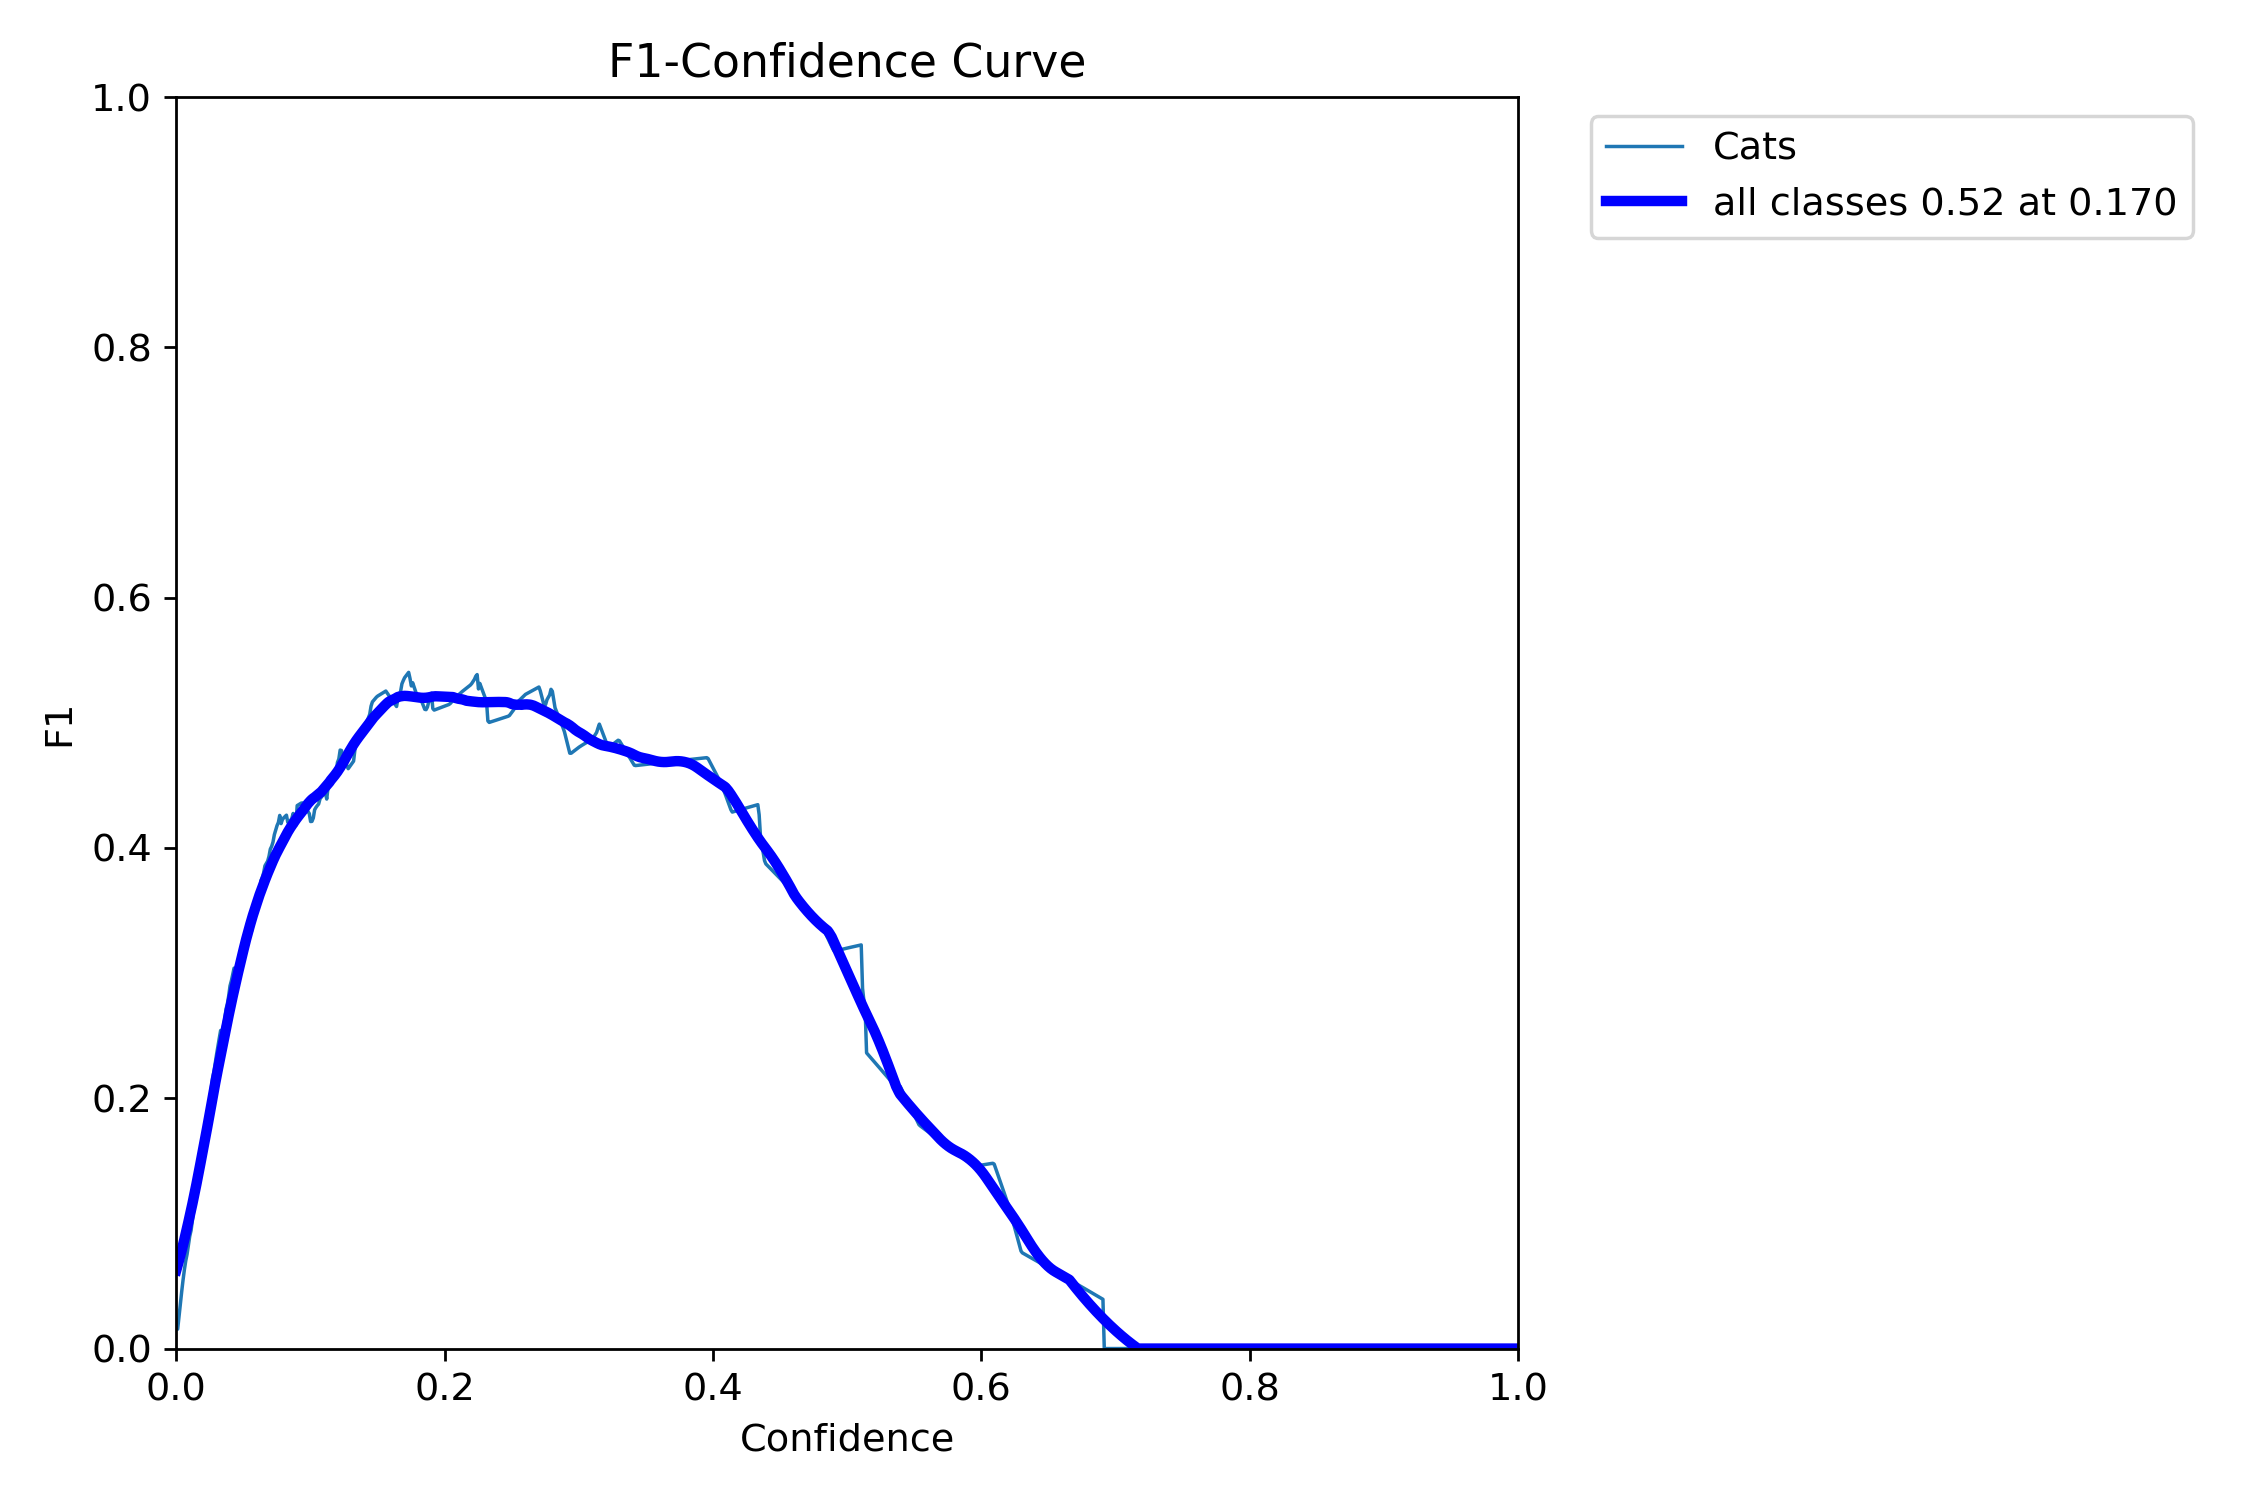

In [8]:
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

_______________________________________________________________________________________________

## Testing the model
Previously, the model only saw pictures in the **train** folder. Now, we will show it the pictures in the **test** folder, pictures the model has never seen before. Based on how good the model's performance is with the test images, we can have an idea of what the model's performance with data in the real world will be.

## Here is the image we want to test

In [11]:
test1 =  f"{HOME}/datasets/Dog_Cat-Test-1/test/images/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg"

'/home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/test/images/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg'

## Test pt model


image 1/1 /home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/test/images/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg: 640x640 1 cat, 4.5ms
Speed: 1.4ms preprocess, 4.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


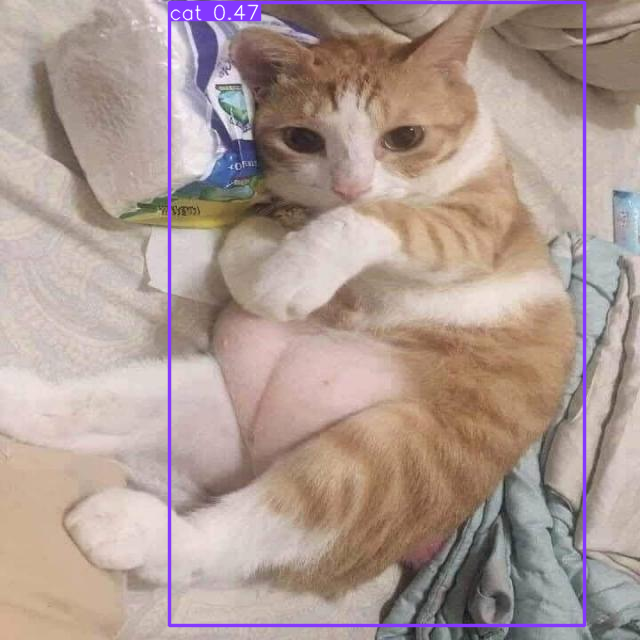

In [15]:
# Load a pretrained YOLOv8n model
model_1 = YOLO('yolov8n.pt')

# Run inference on an image
results_1 = model_1(test1)  # list of 1 Results object
for result in results_1:
    result.show()  # display to screen

## Test our model

/home/rosworkshop/CV_WorkShop

image 1/1 /home/rosworkshop/CV_WorkShop/datasets/Dog_Cat-Test-1/test/images/2T7OkT9RmTY_jpg.rf.7f68fbcbf3cd762eeefb2c42526c7807.jpg: 640x640 2 Catss, 7.9ms
Speed: 1.8ms preprocess, 7.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


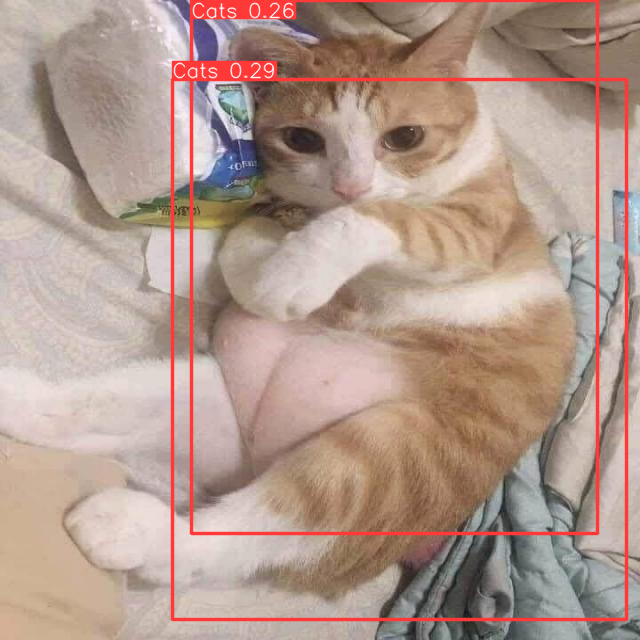

In [14]:
from ultralytics import YOLO
# Load a model
%cd {HOME}
model_path=f"{HOME}/runs/detect/train/weights/best.pt"

model_2 = YOLO(model_path)  # pretrained YOLOv8n model

# Run batched inference on a list of images
results_2 = model_2(test1)  # list of 1 Results object

# Process results list
for result in results_2:
    result.show()  # display to screen
   